In [13]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
all=pd.read_csv("drive/My Drive/Colab Notebooks/2004ssnen.csv")
vecs=all.drop(['団体コード','都道府県名'],axis=1)
vecs.sample(5)

,市区町村名,0～4歳,5～9,10～14,15～19,20～24,25～29,30～34,35～39,40～44,45～49,50～54,55～59,60～64,65～69,70～74,75～79,80～84,85～89,90～94,95～99,100歳以上
1332,栗東市,3880,3731,4062,4104,3689,4229,4695,4898,5886,6468,4806,3519,2982,3325,3706,2754,1719,1017,479,126,16
1818,大洲市,1381,1745,1766,1946,1614,1459,1762,2201,2502,2739,2445,2737,3203,3601,3343,2604,2320,1957,1032,302,47
1549,磯城郡三宅町,193,227,244,272,302,323,310,315,385,490,451,455,426,537,570,588,389,227,102,30,6
846,茅ヶ崎市,9438,11043,11380,11730,11195,10285,11820,15147,18431,21583,19135,15441,13027,14572,16206,14032,10027,5965,2589,739,99
1108,上水内郡小川村*,49,57,87,93,70,50,60,111,113,153,128,139,187,205,212,211,170,181,103,39,5


In [15]:
def cosine_similarity_matrix (vectors):
    unit_vectors = vectors / np.linalg.norm(vectors, axis=1, keepdims=True)
    return np.matmul(unit_vectors, unit_vectors.T)

matrix = cosine_similarity_matrix(vecs.drop('市区町村名',axis=1).to_numpy())

In [16]:
df = pd.DataFrame(matrix, index=vecs['市区町村名'], columns=vecs['市区町村名'])

In [17]:
city='高知市'
df[city].sort_values(ascending=False).drop(index=city).head(10)

市区町村名
長野市        0.999198
新潟市西区      0.999128
新潟市        0.999098
富山市        0.999082
徳島市        0.999039
松阪市        0.998940
上伊那郡箕輪町    0.998888
山口市        0.998809
焼津市        0.998807
前橋市        0.998796
Name: 高知市, dtype: float64

In [18]:
c=vecs[(vecs['市区町村名']==city) | (vecs['市区町村名']=='長野市')]
v=c.drop('市区町村名',axis=1).to_numpy()
c

,市区町村名,0～4歳,5～9,10～14,15～19,20～24,25～29,30～34,35～39,40～44,45～49,50～54,55～59,60～64,65～69,70～74,75～79,80～84,85～89,90～94,95～99,100歳以上
1021,長野市,13898,15745,17004,18352,16979,16714,18513,21222,25574,29448,25637,23367,22934,24749,25971,21887,16460,12290,6877,1978,285
1839,高知市,12240,13423,14286,15484,14811,14271,16066,18805,23192,26291,21377,20842,20130,22614,24522,18517,13258,10148,5423,1649,226


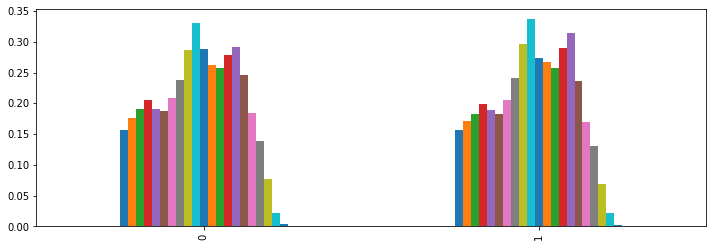

In [19]:
pd.DataFrame(v/np.linalg.norm(v, axis=1,keepdims=True)).plot( kind='bar', legend=False, figsize=(12,4))

In [20]:
df[city].sort_values(ascending=True).drop(index=city).filter(regex='市').head(10)

市区町村名
大阪市浪速区    0.852182
夕張市       0.892318
大阪市中央区    0.892388
歌志内市*     0.892572
名古屋市中区    0.897089
大阪市西区     0.899588
室戸市       0.910233
珠洲市       0.913809
福岡市博多区    0.915086
熱海市       0.919164
Name: 高知市, dtype: float64

In [21]:
c=vecs[(vecs['市区町村名']==city) | (vecs['市区町村名']=='福岡市博多区')]
v=c.drop('市区町村名',axis=1).to_numpy()
c

,市区町村名,0～4歳,5～9,10～14,15～19,20～24,25～29,30～34,35～39,40～44,45～49,50～54,55～59,60～64,65～69,70～74,75～79,80～84,85～89,90～94,95～99,100歳以上
1839,高知市,12240,13423,14286,15484,14811,14271,16066,18805,23192,26291,21377,20842,20130,22614,24522,18517,13258,10148,5423,1649,226
1889,福岡市博多区,10025,7994,7370,8668,19222,24411,21634,19263,18169,17872,14523,11890,10774,11432,10862,7877,5756,3823,1867,542,88


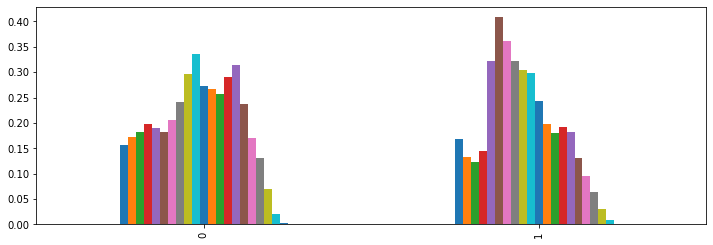

In [22]:
pd.DataFrame(v/np.linalg.norm(v, axis=1,keepdims=True)).plot( kind='bar', legend=False, figsize=(12,4))